# Placa semicircular en voladizo

In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
#%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot3d

In [4]:
init_session()

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [5]:
def dens_ener_def(w, D, nu):
    ener_def = D*((w.diff(x, 2) + w.diff(y, 2))**2
              - 2*(1 - nu)*(w.diff(x, 2)*w.diff(y, 2) - w.diff(x, y)**2))
    return ener_def/2

In [6]:
a1, a2, a3, a4, a5, a6 = symbols("a1 a2 a3 a4 a5 a6")
D, nu, P = symbols("D nu P")

In [7]:
w = y**2 * (a1 + a2*x + a3*y + a4*x**2 + a5*x*y + a6*y**2)
w

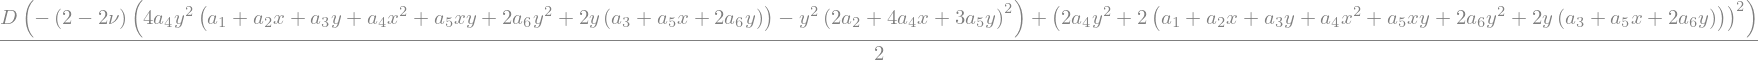

In [8]:
U = dens_ener_def(w, D, nu)
U

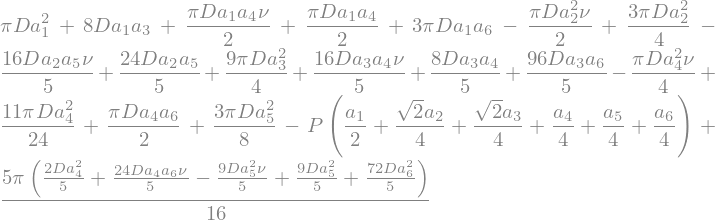

In [9]:
Pi = U.integrate((y, 0, sqrt(1 - x**2)), (x, -1, 1)) - P*w.subs(x, sqrt(2)/2).subs(y, sqrt(2)/2)
Pi

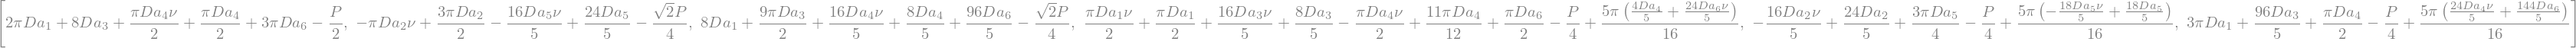

In [11]:
eqs = [Pi.diff(a1),
       Pi.diff(a2),
       Pi.diff(a3),
       Pi.diff(a4),
       Pi.diff(a5),
       Pi.diff(a6)]
eqs

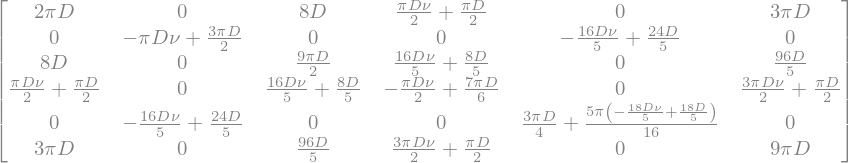

In [12]:
Matrix(eqs).jacobian([a1, a2, a3, a4, a5, a6])

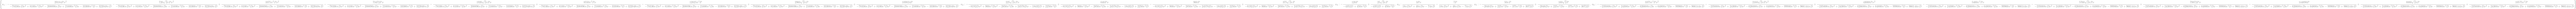

In [13]:
a_sol = solve(eqs, [a1, a2, a3, a4, a5, a6])
a_sol

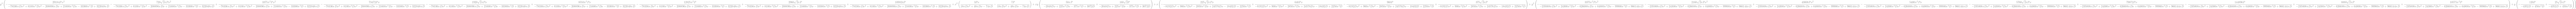

In [14]:
w_sol = w.subs(a_sol)
w_sol

In [15]:
w_num = lambdify((x, y, P, D, nu), w_sol)

In [17]:
R, T = np.mgrid[0:1:21j, 0:np.pi:21j]
X = R*np.cos(T)
Y = R*np.sin(T)

In [19]:
fig1 = plt.figure(figsize=(6, 4))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, w_num(X, Y, 1, 1, 0.3), cmap="Purples_r",
                 cstride=1, rstride=1, alpha=0.8,
                 lw=0.5, edgecolor="#3c3c3c")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_zlabel("$w(x, y)$")
plt.show()